In [1]:
# 필요한 라이브러리를 불러옵니다.
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
# x_train 과 y_train 데이터를 정의
x_train = np.array([1, 2, 3])
y_train = np.array([2+0.1, 4-0.3, 6+0.15])

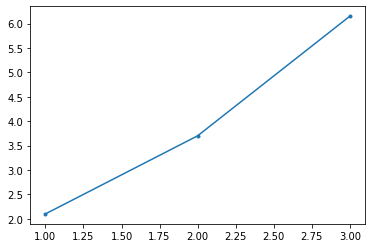

In [3]:
plt.figure()
plt.plot(x_train, y_train, '.-')

### linear regression

In [12]:
# Sequential 모델을 생성합니다.
model = Sequential()

# 모델에 Dense Layer를 추가합니다. 여기서는 입력 변수가 1개이므로 input_shape는 1입니다.
model.add(Dense(1, input_shape=(1,))) # linear hypothesis

# 모델을 컴파일합니다. 이때, 최적화 알고리즘은 Adam, 손실 함수는 mean_squared_error를 사용합니다.
model.compile(optimizer=Adam(0.1), loss='mean_squared_error')

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 학습이 되기전 predict 해보기

In [19]:
model.predict([-3])

array([[-1.7829713]], dtype=float32)

In [20]:
model.layers[0].get_weights()

[array([[0.59432375]], dtype=float32), array([0.], dtype=float32)]

In [21]:
w = model.layers[0].get_weights()[0][0][0]
b = model.layers[0].get_weights()[1][0]
print(w * -3 + b)

-1.7829712629318237


### Training 하기

In [8]:
#model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0)

In [22]:
# 모델의 초기 가중치와 편향을 저장합니다.
weights = []
biases = []
weights.append(model.layers[0].get_weights()[0][0][0])
biases.append(model.layers[0].get_weights()[1][0])

# 모델을 학습시킵니다. 이때, epoch은 100, batch_size는 1로 설정합니다.
for i in range(100):
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=0)
    weights.append(model.layers[0].get_weights()[0][0][0])
    biases.append(model.layers[0].get_weights()[1][0])

In [23]:
model.predict([-3])

array([[-6.1430216]], dtype=float32)

### Visualization

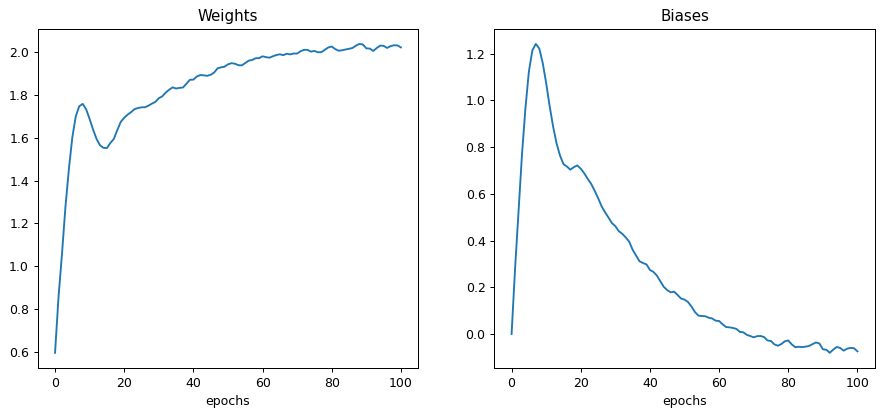

In [24]:
# 모델의 가중치와 편향의 변화를 시각화합니다.
plt.figure(figsize=(12, 5), dpi=90)

plt.subplot(1, 2, 1)
plt.plot(weights)
plt.title('Weights')
plt.xlabel('epochs')

plt.subplot(1, 2, 2)
plt.plot(biases)
plt.title('Biases')
plt.xlabel('epochs')
plt.show()

$y=wx+b$

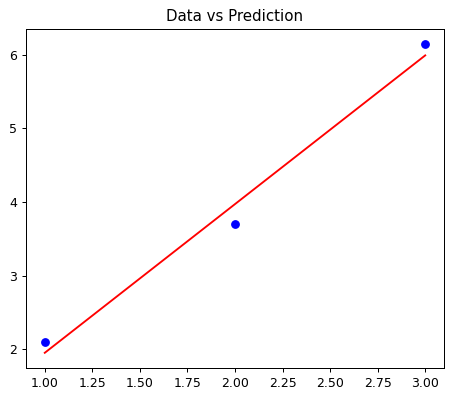

In [25]:
# 마지막으로 구한 가중치와 편향을 사용해 데이터와 함께 그래프를 그립니다.
plt.figure(figsize=(6, 5), dpi=90)
plt.scatter(x_train, y_train, color='blue')  # 원본 데이터를 그립니다.
plt.plot(x_train, weights[-1]*x_train + biases[-1], color='red')  # 학습된 모델의 예측값을 그립니다.
plt.title('Data vs Prediction')
plt.show()

### 모델의 R-squared 값을 계산

In [26]:
# 필요한 라이브러리를 불러옵니다.
from sklearn.metrics import r2_score

# 모델로부터 예측값을 얻습니다.
y_pred = model.predict(x_train) # hypothesis or y_hat

# sklearn의 r2_score 함수를 이용하여 R-squared 값을 계산합니다.
r_squared = r2_score(y_train, y_pred)


In [27]:
# R-squared 값을 출력합니다.
print('R-squared: ', r_squared)

R-squared:  0.9854775497090752


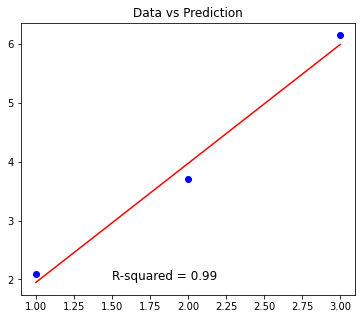

In [28]:
# 마지막으로 구한 가중치와 편향을 사용해 데이터와 함께 그래프를 그립니다.
plt.figure(figsize=(6, 5))
plt.scatter(x_train, y_train, color='blue')  # 원본 데이터를 그립니다.
plt.plot(x_train, weights[-1]*x_train + biases[-1], color='red')  # 학습된 모델의 예측값을 그립니다.
plt.title('Data vs Prediction')
# R-squared 값을 그래프에 표시합니다.
plt.text(1.5, 2, 'R-squared = %0.2f' % r_squared, fontsize=12)
plt.show()